# Разведывательный анализ данных  

Импортируем библиотеки и загружаем датасет.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

Общие функции вынесем наверх.

In [2]:
def gitalize_column(column):  # цифровезуем полученную колонку, чтобы считать кореляции
    print('Преобразуем столбец', column)
    index = list(students[column].dropna().unique())
    for value in index:
        print('{} - {}'.format(index.index(value), value))
    print()
    students[column] = students[column].astype(str).apply(
        lambda x: None if x.strip() == 'nan' else index.index(x)).astype(float)

In [3]:
def get_stat_dif(column):  # теста Стьюдента
    cols = students.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [4]:
def get_boxplot(column):  # рисуем боксплот
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index)],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Ознакомимся с датасетом.

In [5]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Видим что практически во всем датасете есть пропуски, сразу заменим их на None в текстовых столбцах, а заодно закодируем цифрами текстовые колонки - это позволит считать корреляции на следующих шагах.

Сразу видим, что "studytime" и "studytime, granular" скорее всего дублируют друг друга, проверим:

In [6]:
students.loc[:, ['studytime, granular', 'studytime']].corr()

,"studytime, granular",studytime
"studytime, granular",1.0,-1.0
studytime,-1.0,1.0


Так и есть. Безжалостно удаляем "studytime, granular"

In [7]:
students.drop(['studytime, granular'], inplace=True, axis=1)

Дадим столбцам более наглядные названия.

In [8]:
students.columns = ['school', 'sex', 'age', 'address_type', 'family_size', 'parents_status', 'mother_education', 'father_education', 'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time',
                    'failures', 'school_support', 'family_support', 'additional_paid_lessons', 'activities', 'nursery_school', 'higher', 'internet', 'romantic', 'family_relations', 'free_time', 'go_out', 'health', 'absences', 'score']

In [9]:
for column in students:
    if students[column].dtype == 'O':  # если текстовый столбец
        # если это колонка да/нет
        if len(students.loc[students[column].isin(['yes', 'no'])]) > 0:
            print('Преобразуем столбец', column)
            print('0 - no\n1 - yes\n')
            students[column] = students[column].astype(str).apply(lambda x: None if x.strip(
            ) == '' else 0 if x == 'no' else 1 if x == 'yes' else x).astype(float)
        else:  # остадльные текстовые колонки
            gitalize_column(column)

Преобразуем столбец school
0 - GP
1 - MS

Преобразуем столбец sex
0 - F
1 - M

Преобразуем столбец address_type
0 - U
1 - R

Преобразуем столбец family_size
0 - GT3
1 - LE3

Преобразуем столбец parents_status
0 - A
1 - T

Преобразуем столбец mother_job
0 - at_home
1 - health
2 - other
3 - services
4 - teacher

Преобразуем столбец father_job
0 - teacher
1 - other
2 - health
3 - services
4 - at_home

Преобразуем столбец reason
0 - course
1 - other
2 - home
3 - reputation

Преобразуем столбец guardian
0 - mother
1 - father
2 - other

Преобразуем столбец school_support
0 - no
1 - yes

Преобразуем столбец family_support
0 - no
1 - yes

Преобразуем столбец additional_paid_lessons
0 - no
1 - yes

Преобразуем столбец activities
0 - no
1 - yes

Преобразуем столбец nursery_school
0 - no
1 - yes

Преобразуем столбец higher
0 - no
1 - yes

Преобразуем столбец internet
0 - no
1 - yes

Преобразуем столбец romantic
0 - no
1 - yes



Посмотрим, что получилось.

In [10]:
display(students.head(10))

,school,sex,age,address_type,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,additional_paid_lessons,activities,nursery_school,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
0,0.0,0.0,18,0.0,NaN,0.0,4.0,4.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,0.0,0.0,17,0.0,0.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,0.0,0.0,15,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,0.0,0.0,15,0.0,0.0,1.0,4.0,2.0,1.0,NaN,2.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,75.0
4,0.0,0.0,16,0.0,0.0,1.0,3.0,3.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
5,0.0,1.0,16,0.0,1.0,1.0,4.0,3.0,3.0,1.0,3.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,4.0,2.0,5.0,10.0,75.0
6,0.0,1.0,16,NaN,1.0,1.0,2.0,2.0,2.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,4.0,4.0,3.0,0.0,55.0
7,0.0,0.0,17,0.0,0.0,0.0,4.0,4.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,4.0,1.0,6.0,30.0
8,0.0,1.0,15,0.0,1.0,0.0,3.0,2.0,3.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,2.0,2.0,1.0,0.0,95.0
9,0.0,1.0,15,0.0,NaN,NaN,3.0,4.0,2.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,5.0,1.0,5.0,0.0,75.0


Отлично! Теперь проверим на выбросы.

In [11]:
pd.DataFrame(students.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Тут все ок.

In [12]:
pd.DataFrame(students.mother_education.value_counts(dropna=False))

,mother_education
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


Есть пропуски, но так все ок.

In [13]:
pd.DataFrame(students.father_education.value_counts(dropna=False))

,father_education
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


Ага, у одного отца аж 40 балов, а мы знаем, что максимум 4, сразу дропнем неправильную запись.

In [14]:
students = students.loc[students.father_education <= 4]

In [15]:
pd.DataFrame(students.father_education.value_counts(dropna=False))

,father_education
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


Ну вот, другое дело. Продолжаем.

In [16]:
pd.DataFrame(students.travel_time.value_counts())

,travel_time
1.0,225
2.0,92
3.0,21
4.0,7


Ок

In [17]:
pd.DataFrame(students.study_time.value_counts())

,study_time
2.0,182
1.0,98
3.0,58
4.0,25


Ок

In [18]:
pd.DataFrame(students.failures.value_counts())

,failures
0.0,277
1.0,45
3.0,15
2.0,14


Ок

In [19]:
pd.DataFrame(students.family_relations.value_counts())

,family_relations
4.0,168
5.0,95
3.0,59
2.0,16
1.0,7
-1.0,1


Ага, у кого-то прям совсем плохо (-1), это явно ошибка, уберем строку.

In [20]:
students = students.loc[students.family_relations >= 1]

In [21]:
pd.DataFrame(students.family_relations.value_counts())

,family_relations
4.0,168
5.0,95
3.0,59
2.0,16
1.0,7


Во, другое дело.

In [22]:
pd.DataFrame(students.free_time.value_counts())

,free_time
3.0,134
4.0,97
2.0,54
5.0,34
1.0,17


Ок

In [23]:
pd.DataFrame(students.go_out.value_counts())

,go_out
3.0,115
2.0,87
4.0,71
5.0,45
1.0,19


Ок

In [24]:
pd.DataFrame(students.health.value_counts())

,health
5.0,111
3.0,81
4.0,58
1.0,42
2.0,40


Ок

count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

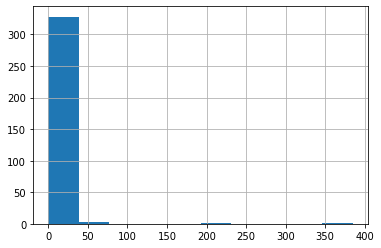

In [25]:
students.absences.hist()
students.absences.describe()

Тут явно что-то не то. Мы не знаем сколько всего занятий было, поэтому посчитаем квартили) 

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


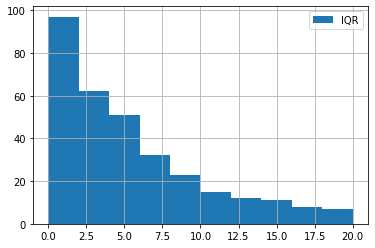

In [26]:
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

students.absences.loc[students.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(label='IQR')

plt.legend()

Удалим все что больше perc75 + 1.5*IQR (т.е 20-ти)

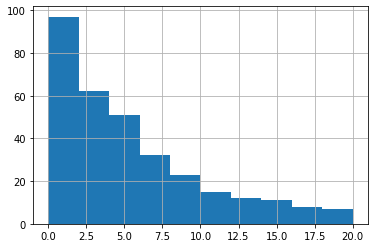

In [27]:
students = students.loc[students.absences <= 20]
students.absences.hist()

Отлично, идём дальше.

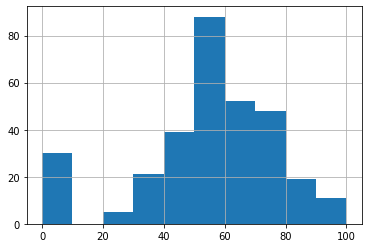

In [28]:
students.score.hist()

Похоже на правду. Теперь быстренько взглянем на корреляции и удалим слабые и слишком сильные.

In [29]:
students.corr()

,school,sex,age,address_type,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,additional_paid_lessons,activities,nursery_school,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
school,1.000000,-0.007609,0.388676,0.282005,0.045152,0.123354,-0.117329,-0.104050,-0.020662,0.149275,-0.097827,0.059260,0.270737,-0.084668,0.064480,-0.142223,-0.184056,0.015296,-0.094113,-0.141315,-0.010242,-0.052950,0.068067,-0.070162,-0.016467,-0.064579,-0.031741,-0.089975,-0.059078
sex,-0.007609,1.000000,0.000561,-0.007373,0.076854,0.027642,0.051346,0.013566,0.185722,-0.015691,-0.071467,-0.004900,0.071119,-0.289187,0.041370,-0.150100,-0.189271,-0.134704,0.107150,-0.030963,-0.157895,0.081095,-0.109659,0.042899,0.220213,0.074743,0.125663,0.017855,0.106929
age,0.388676,0.000561,1.000000,0.162341,-0.018332,0.058530,-0.176250,-0.193469,-0.050774,0.104207,-0.043051,0.231875,0.073914,-0.015188,0.219710,-0.245344,-0.150083,-0.070184,-0.088867,-0.118230,-0.214104,-0.095207,0.096864,0.058482,0.045144,0.097906,-0.061147,0.138921,-0.152937
address_type,0.282005,-0.007373,0.162341,1.000000,-0.054242,0.078620,-0.140680,-0.112060,-0.099388,0.023072,0.007166,-0.082133,0.257037,0.059276,0.092601,-0.064783,0.018199,-0.011069,0.079498,-0.058378,-0.022610,-0.232078,0.004969,-0.000591,-0.080348,-0.133461,0.046559,0.032118,-0.126395
family_size,0.045152,0.076854,-0.018332,-0.054242,1.000000,-0.052962,0.008007,-0.068836,0.125016,0.012468,-0.040577,-0.108276,0.063457,-0.091955,-0.034144,-0.013484,-0.098130,-0.074626,-0.040880,0.148934,0.032774,0.002586,0.028500,-0.031019,0.023747,0.014128,0.004842,0.088413,0.098958
parents_status,0.123354,0.027642,0.058530,0.078620,-0.052962,1.000000,-0.169471,-0.148093,-0.049030,0.108444,-0.058063,0.000324,0.143851,-0.026478,0.041221,-0.099943,-0.051588,0.040762,0.083315,-0.090367,-0.070120,0.052470,-0.023631,0.032206,0.016306,0.043178,0.025886,-0.097045,-0.060913
mother_education,-0.117329,0.051346,-0.176250,-0.140680,0.008007,-0.169471,1.000000,0.647425,0.463280,-0.143148,0.113354,-0.145717,-0.188525,0.096564,-0.242613,0.000608,0.200725,0.123352,0.108670,0.162248,0.161717,0.221970,0.041485,-0.034579,0.006825,0.056204,-0.079287,0.102861,0.198240
father_education,-0.104050,0.013566,-0.193469,-0.112060,-0.068836,-0.148093,0.647425,1.000000,0.246847,-0.119037,0.069890,-0.009724,-0.193201,0.003729,-0.281114,0.084744,0.216319,0.055728,0.107508,0.122762,0.176561,0.151865,0.017205,-0.040042,-0.018485,0.011471,0.007139,-0.009144,0.114211
mother_job,-0.020662,0.185722,-0.050774,-0.099388,0.125016,-0.049030,0.463280,0.246847,1.000000,0.047613,0.021793,-0.115065,-0.054849,-0.025682,-0.071459,-0.061012,0.039166,0.114024,0.080617,0.100453,0.066318,0.181812,-0.082181,0.052606,0.131423,0.018197,0.081797,0.025048,0.103420
father_job,0.149275,-0.015691,0.104207,0.023072,0.012468,0.108444,-0.143148,-0.119037,0.047613,1.000000,0.026127,0.080137,-0.024713,0.026153,0.085411,-0.026613,-0.082628,-0.030276,0.104773,0.038560,-0.086430,0.142635,0.050593,0.032771,0.042575,0.024255,-0.110250,-0.077925,-0.031504


Забавный факт, самая большая корреляция между образованием родителей, при этом работа матери зависит от образования, а у отца чуть ли не наоборот. А еще образование отца сильно влияет на количество неудач.

Образование отца уберем. А еще уберем школу, статус отношений родителей, работу отца, работу матери (она явно зависит от образования), причину выбора школы, наличие наставника и время до школы, поддержку школы и поддержку семьи, детский сад, наличие интернета и романтических отношений, наличия свободного времени, состояния здоровья и даже количество пропущенных занятий.

In [30]:
students = students.reindex(columns=['sex', 'age', 'address_type', 'family_size', 'mother_education',
                                     'study_time', 'failures', 'additional_paid_lessons', 'higher', 'go_out', 'score'])

In [31]:
students

,sex,age,address_type,family_size,mother_education,study_time,failures,additional_paid_lessons,higher,go_out,score
0,0.0,18,0.0,NaN,4.0,2.0,0.0,0.0,1.0,4.0,30.0
1,0.0,17,0.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,30.0
2,0.0,15,0.0,1.0,1.0,2.0,3.0,NaN,1.0,2.0,50.0
3,0.0,15,0.0,0.0,4.0,3.0,0.0,1.0,1.0,2.0,75.0
4,0.0,16,0.0,0.0,3.0,2.0,0.0,1.0,1.0,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...
389,0.0,18,0.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0
391,1.0,17,0.0,1.0,3.0,1.0,0.0,0.0,1.0,5.0,80.0
392,1.0,21,1.0,0.0,1.0,1.0,3.0,0.0,NaN,3.0,35.0
393,1.0,18,1.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0,50.0


Ну вот мы и готовы считать корреляции и делать выводы.

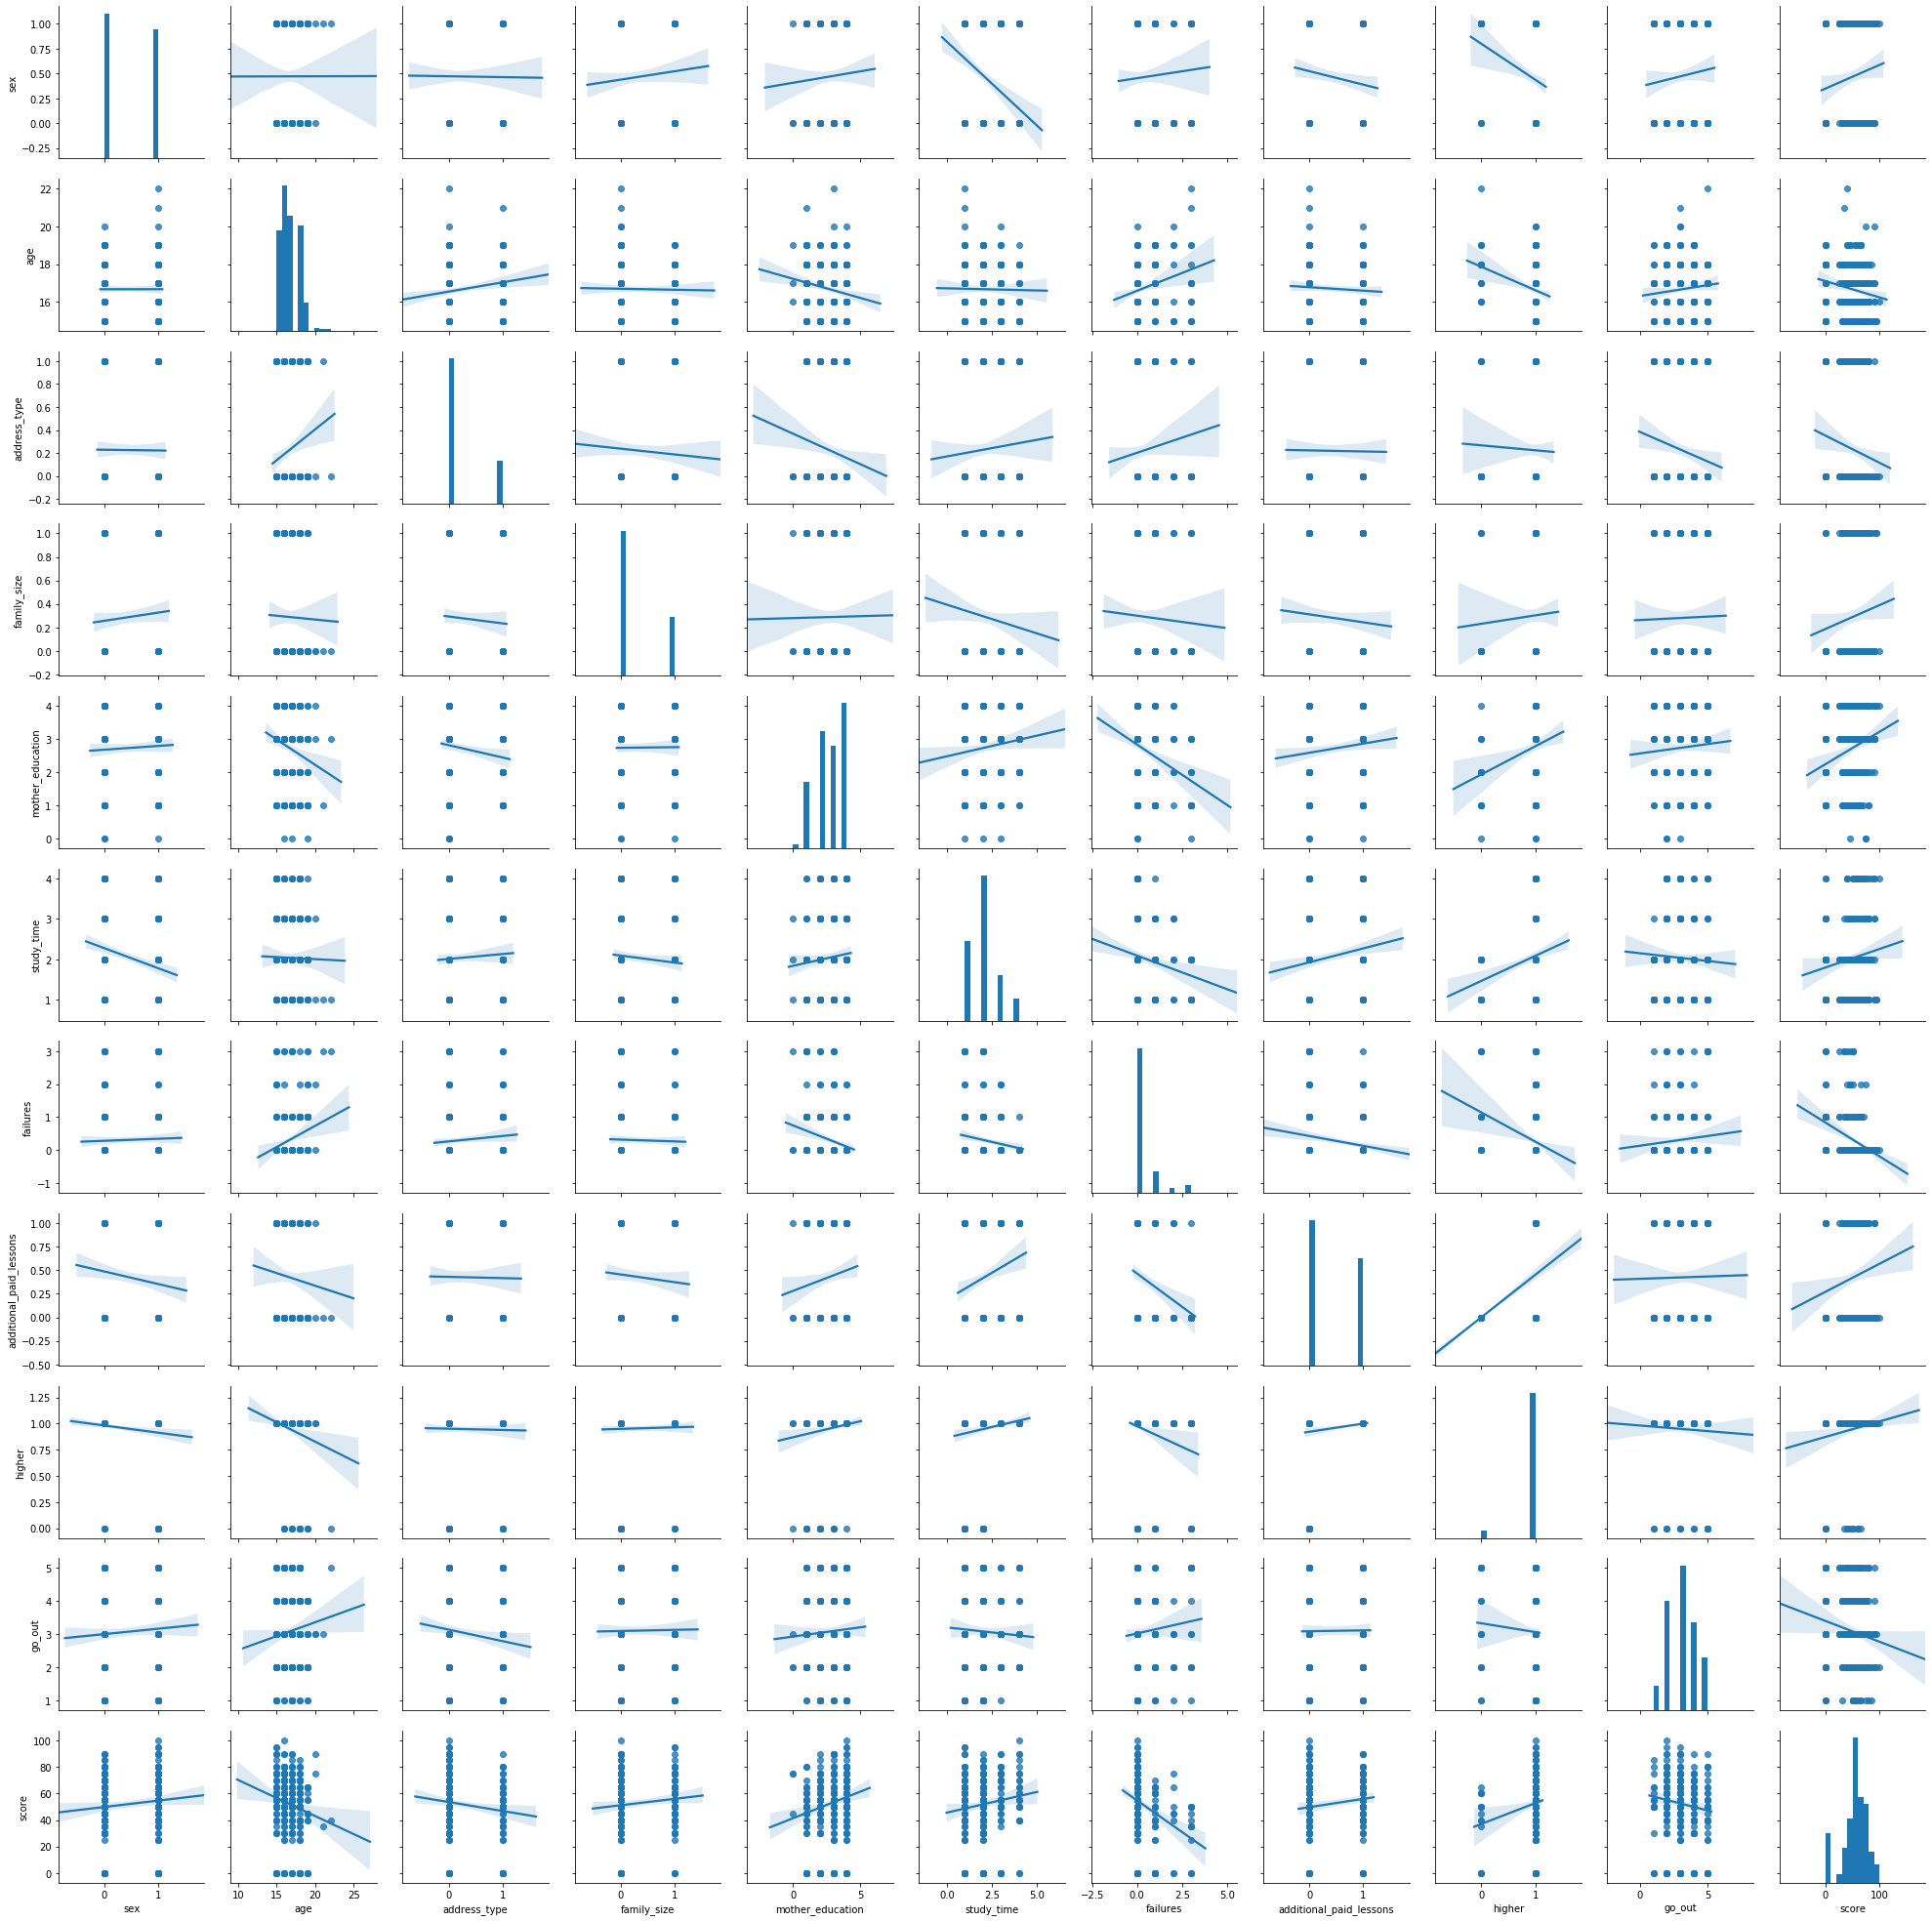

In [32]:
sns.pairplot(students, kind='reg')

И еще графиков.

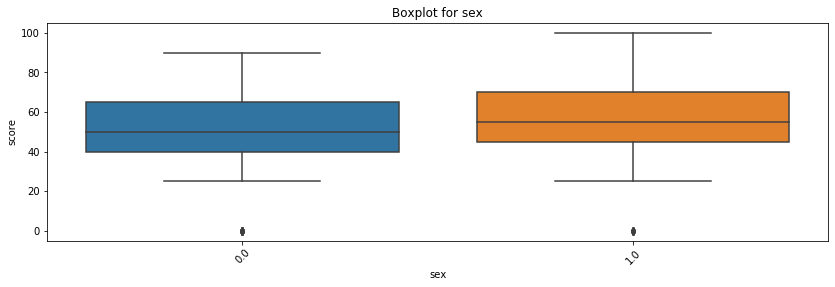

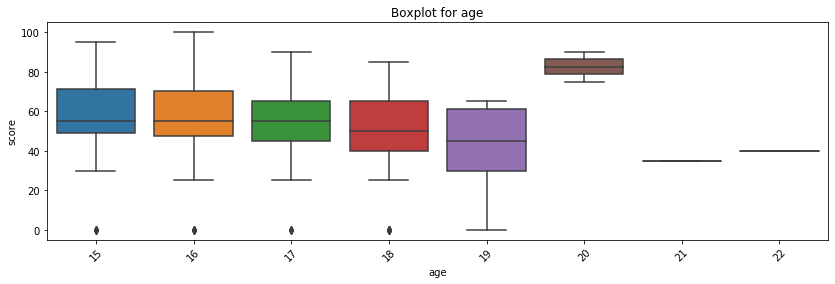

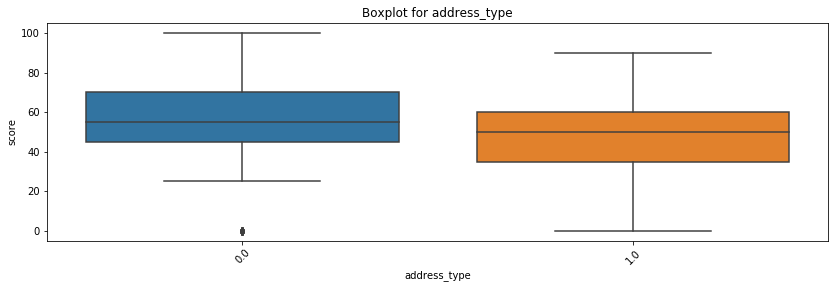

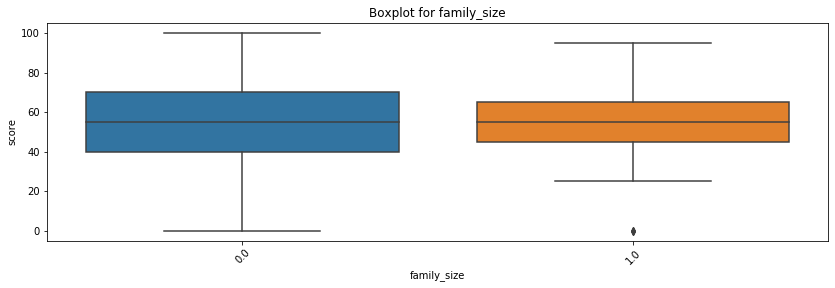

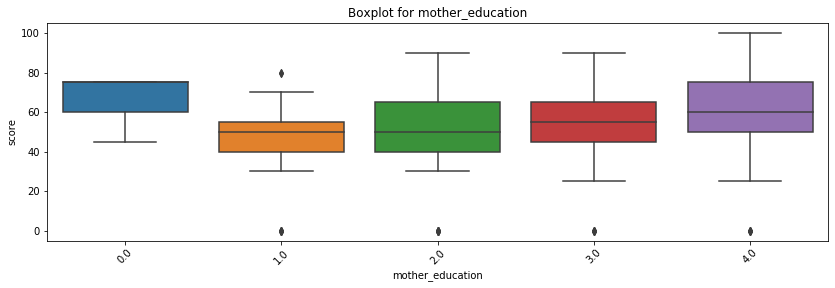

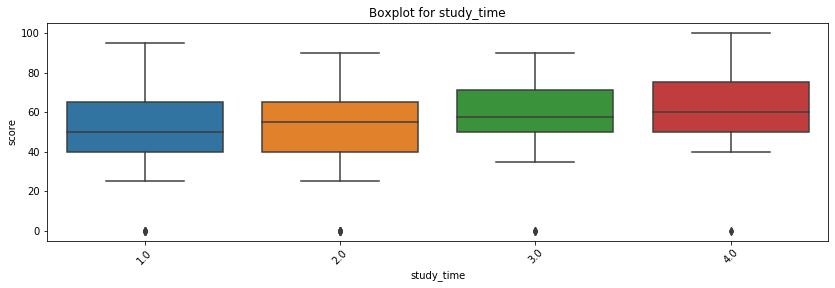

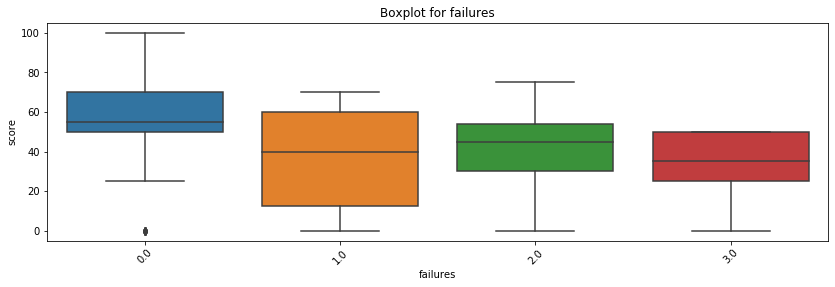

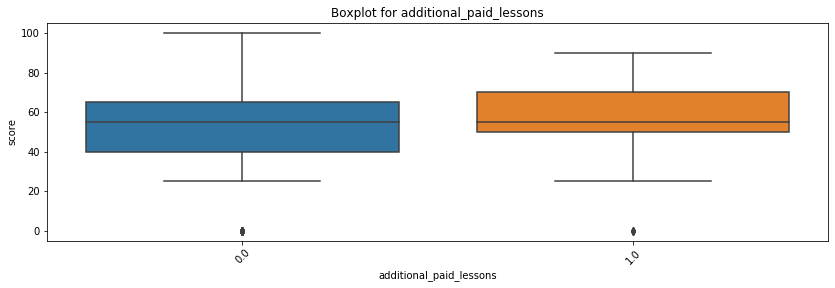

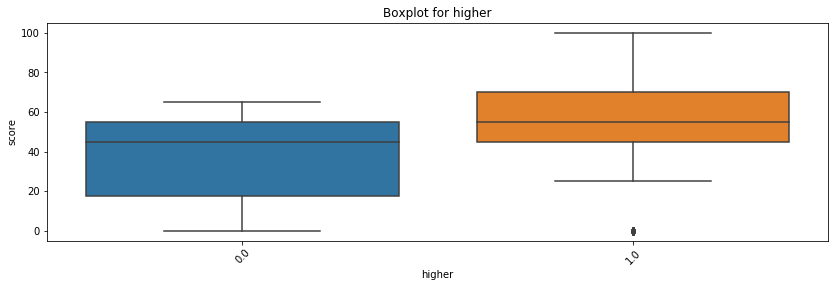

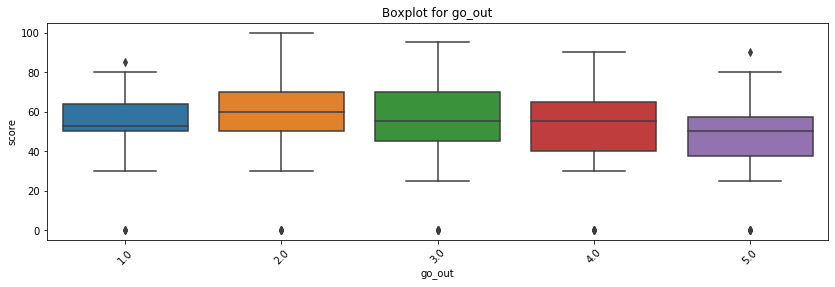

In [33]:
for col in ['sex', 'age', 'address_type', 'family_size', 'mother_education', 'study_time', 'failures', 'additional_paid_lessons', 'higher', 'go_out']:
    get_boxplot(col)

Воспользуемся примером использования теста стьюдента из примера про какао:

In [34]:
for col in ['sex', 'age', 'address_type', 'family_size', 'mother_education', 'study_time', 'failures', 'additional_paid_lessons', 'higher', 'go_out']:
    get_stat_dif(col)

Тут ничего не нашлось.

# Выводы

В данные в датасете почти полные, хотелось бы поменьше пропусков, но что делать) Были выбросы, мы все поправили. А еще убрали дублирующий столбец.

Рецепт хорошей оценки по математике прост – родится мальчиком (не принципиально, но желательно), сдавать экзамен до 17 лет, жить в городе, мама с высшим образованием (а если не высшее, то лучше вообще без него), уделать побольше времени на учебу (хотя некоторым везет и так), не иметь неудач (здесь отец с высшим образованием поможет), немножко играть с друзьями но не перегуливать.

Ну а главное - хотеть получить высшее образование (интересно это причина или следствие).

Про походы на платные уроки спорно - судя по всему они помогают середнячкам подтянуть хвосты, нежели делают гениев.

Наличие интернета и романтических отношений не сказывается на учебе, хотя казалось бы).

К группе риска мы отнесем учащихся имеющих хоть одну внеучебную неудачу, также на не сдавших экзамен до 18 лет и желающих получить высшее образование.